In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv("../../Files/gene_expression.csv")


In [3]:

df.head()


,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
from sklearn.model_selection import train_test_split


In [5]:
from sklearn.preprocessing import StandardScaler


In [6]:
X = df.drop("Cancer Present", axis=1)


In [7]:
y = df["Cancer Present"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)


In [9]:
scaler = StandardScaler()


In [10]:
scaled_X_train = scaler.fit_transform(X_train)


In [11]:
scaled_X_test = scaler.transform(X_test)


In [12]:
from sklearn.neighbors import KNeighborsClassifier


In [13]:
from sklearn.metrics import accuracy_score


In [14]:
test_error_rates = []

for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)

    y_prediction = model.predict(scaled_X_test)
    accuracy = accuracy_score(y_test, y_prediction)
    test_error = 1-accuracy

    test_error_rates.append(test_error)


c:\Users\habib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\habib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [15]:

test_error_rates


[0.08333333333333337,
 0.0922222222222222,
 0.07111111111111112,
 0.06555555555555559,
 0.06444444444444442,
 0.05888888888888888,
 0.06555555555555559,
 0.06333333333333335,
 0.06555555555555559,
 0.06333333333333335,
 0.06888888888888889,
 0.06333333333333335,
 0.06444444444444442,
 0.06222222222222218,
 0.06777777777777783,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06333333333333335,
 0.06222222222222218,
 0.06222222222222218,
 0.06444444444444442,
 0.061111111111111116,
 0.06000000000000005,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.061111111111111116,
 0.06222222222222218]

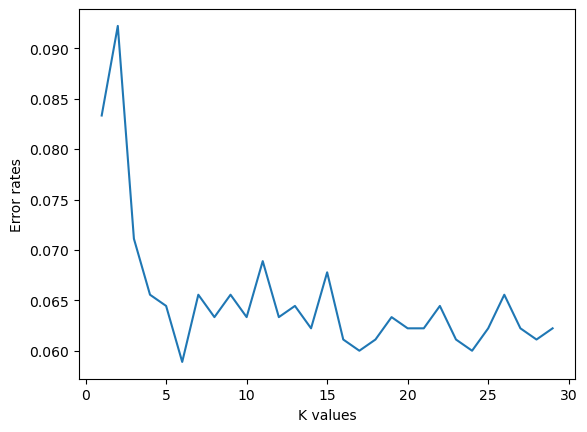

In [16]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel("Error rates")
plt.xlabel("K values")
plt.savefig("Error rates graph.png")
plt.show()
